                                                        QTM 151 Final Project- Formula 1
Project members: Jonathan Wang, Samuel Lim, Enoc De Jesus, Charlington Coulanges\
QTM 151-1

# 1. Introduction

Formula 1, or F1, stands at the pinnacle of international motorsport, showcasing cutting-edge technology and high-speed racing on a global scale.
It features premier single-seater racing events, with many different iconic tracks. Teams, each with two drivers, compete in aerodynamically advanced cars powered by hybrid units, reaching speeds over 200 miles per hour. The sport demands a unique mix of skill, strategy, and teamwork as drivers vie for the Drivers' and Constructors' Championships. With a history dating back to the 1950s, Formula 1 has become a worldwide spectacle, captivating millions of fans and pushing the boundaries of automotive innovation. F1 races are commonly evaluated using diverse metrics like finishing times and racing features. The "Formula 1" dataset provides access to these metrics, encompassing F1 race data from 1950 to 2023


# Our Question

The central research question of this project is as follows: which circuits produces the fastest average finishing time? We want to analyze the average finishing time of racers (in milliseconds) of different circuits, and compare these averages to see which circuits produce the fastest racing times. This allows us to compare different circuits relative to their finishing times. A variable to clearify is that we are comparing the average COMPLETION time for the race associate with each track and not the fastest LAP time. 

We want to take an atypical examination at the F1 racing data. Fans usually prefer F1 races not by its duration length but by the race's quality, team rivalry, and the competition's overall excitement () 

However, the race's length in time does have its own significance. F1 racer travels in blitzing speed to the point of straining the racer's body with G force and other factors. Therefore, F1 races is a testament to the body and skills of racers, and varying conditions of each race call for adjustment in strategy. Identifying the total race time for each track can be a beneficial indicator for the F1 race team on how they need to plan accordingly. 

Source: https://onestopracing.com/why-do-people-like-watching-formula-1/\
Source: https://motorsportexplained.com/f1-race-length/#:~:text=Formula%201%20is%20a%20spectator%20sport%2C%20and%20it,too%20long%20then%20it%20would%20just%20be%20boring.\
Source: https://www.scienceabc.com/sports/what-are-the-physical-effects-of-formula-one-racing-on-drivers.html

# Data Description

#### 1. Data Tables
The dataset tables we are using are the races dataset and the results dataset. Each row in the races dataset represents each individual racer who have a unique raceId. There are 18 columns in the races dataset and the races have taken place since 1950. In the results dataset, each row represents every result of every race that has taken place. There are a total of 18 columns in results dataset.


In [2]:
#Imports for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Datasets for the project
races = pd.read_csv("raw_data/races.csv") #Races from 1950-2023
results = pd.read_csv("raw_data/results.csv") #sprint results 


#### 2. Merging Procedure
We merge the two datasets, “results” and “races” on the variable raceId because our two variables of interest, “milliseconds” and “name,” are in distinct datasets. Since we are concerned with the performance of drivers on different race circuits, merging on raceId is most appropriate.

In [27]:
#We merge the results table with the races table on the shared column of "raceId" with the results table merging on the left
races_merge = pd.merge(races,
                       results,
                       on = "raceId",
                       how = "left")

#dropping the columns we won't need for the analysis 
races_merge = races_merge.drop(columns=["date","url","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date",
                                        "fp3_time", "quali_date","quali_time","sprint_date"])

display(races_merge)

,raceId,year,round,circuitId,name,time_x,sprint_time,resultId,driverId,constructorId,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,06:00:00,\N,7554.0,18.0,23.0,...,1.0,10.0,58.0,1:34:15.784,5655784,17,3,1:28.020,216.891,1.0
1,1,2009,1,1,Australian Grand Prix,06:00:00,\N,7555.0,22.0,23.0,...,2.0,8.0,58.0,+0.807,5656591,43,14,1:29.066,214.344,1.0
2,1,2009,1,1,Australian Grand Prix,06:00:00,\N,7556.0,15.0,7.0,...,3.0,6.0,58.0,+1.604,5657388,50,10,1:28.916,214.706,1.0
3,1,2009,1,1,Australian Grand Prix,06:00:00,\N,7557.0,10.0,7.0,...,4.0,5.0,58.0,+4.435,5660219,53,6,1:28.416,215.920,1.0
4,1,2009,1,1,Australian Grand Prix,06:00:00,\N,7558.0,4.0,4.0,...,5.0,4.0,58.0,+4.879,5660663,53,9,1:28.712,215.199,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25858,1116,2023,19,69,United States Grand Prix,19:00:00,22:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25859,1117,2023,20,32,Mexico City Grand Prix,20:00:00,\N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25860,1118,2023,21,18,São Paulo Grand Prix,17:00:00,18:30:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25861,1119,2023,22,80,Las Vegas Grand Prix,06:00:00,\N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 3. Describe Columns
The main columns we are interested in are "name" and "milliseconds". The "name" column stands for the name of each racing track, and the "milliseconds" column stands for the finising time in millisecond for each individual race. The reason behind our choice is because we want to look at the average finish time for each circuit, and those two columns will be used to achieve our goal.

##### 4. Data Cleaning
To initiate the data cleaning process, we initially inspected the data types within our recently consolidated dataset. It was observed that the "Milliseconds" column was categorized as an object, prompting the necessity to eliminate empty entries and convert the values in this column into numeric format. To accomplish this, we scrutinized each entry in the milliseconds column to determine its numerical status. Subsequently, we identified multiple instances where incorrect format values were returned, indicating the presence of empty or non-numeric entries. These identified values were then replaced with NaN to signify missing data within the milliseconds column.

In [6]:
races_merge["milliseconds"]

0        5655784
1        5656591
2        5657388
3        5660219
4        5660663
          ...   
25858        NaN
25859        NaN
25860        NaN
25861        NaN
25862        NaN
Name: milliseconds, Length: 25863, dtype: object

In [7]:
races_merge["milliseconds"].str.isnumeric()

0        True
1        True
2        True
3        True
4        True
         ... 
25858     NaN
25859     NaN
25860     NaN
25861     NaN
25862     NaN
Name: milliseconds, Length: 25863, dtype: object

In [8]:
subset = races_merge.query("milliseconds.str.isnumeric()==False")
list_unique = pd.unique(subset["milliseconds"])
list_new = [np.nan]
races_merge["milliseconds"] = races_merge["milliseconds"].replace(list_unique,list_new)

In [9]:
display(list_unique)

array(['\\N'], dtype=object)

In [10]:
races_merge["milliseconds"] = pd.to_numeric(races_merge["milliseconds"])

#### 5. Data Manipulation

After obtaining the broad dataset, we further filter out the circuit name and average finishing time for our analysis through the group by and aggregate functions

When finalizing our data manipulating for fastest circuit, we realized "Las Vegas Grand Prix" had "NaN" for its millisecond value, meaning when plotting the bar graph, the 5 slowest circuits weren't shown properly (only showed 4). The reason for this is that "Las Vegas Grand Prix" in circuits_merged only had one row in the data, which had milliseconds as NaN, and that had no other rows in the dataframe was from Las Vegas with values for data, so we had to remove Las Vegas for our finalized plotting. 

At the end, we decided to convert the finishing time that was in milliseconds to a more comprehensible scale in minutes.

In [11]:
fastest_circuit = (races_merge.groupby(["name"])
                    .agg(avg_finish_time = ("milliseconds", "mean"))
                    .reset_index())

In [12]:
fastest_circuit = fastest_circuit.sort_values(by="avg_finish_time", ascending= False)
display(fastest_circuit)


,name,avg_finish_time
23,Indianapolis 500,1.394267e+07
36,Pescara Grand Prix,1.103700e+07
48,Swiss Grand Prix,8.746640e+06
51,Tuscan Grand Prix,8.395242e+06
34,Moroccan Grand Prix,7.841220e+06
13,Dallas Grand Prix,7.293849e+06
43,Singapore Grand Prix,7.181946e+06
2,Argentine Grand Prix,7.163096e+06
33,Monaco Grand Prix,7.085123e+06
26,Korean Grand Prix,6.902245e+06


In [13]:
display(races_merge.query("name == 'Las Vegas Grand Prix'"))
fastest_circuit = fastest_circuit.query('name != "Las Vegas Grand Prix"')

,raceId,year,round,circuitId,name,time_x,sprint_time,resultId,driverId,constructorId,...,positionOrder,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25861,1119,2023,22,80,Las Vegas Grand Prix,06:00:00,\N,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
fastest_circuit["avg_finish_time"] = fastest_circuit["avg_finish_time"]/(1000*60)
#we want to display the average finishing time in minutes.

# Results

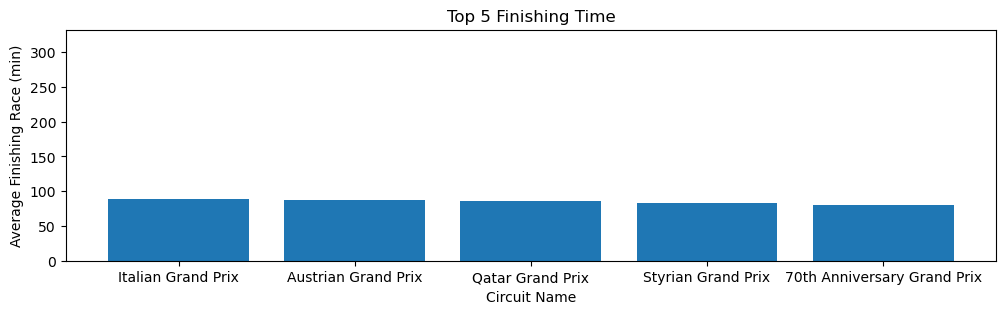

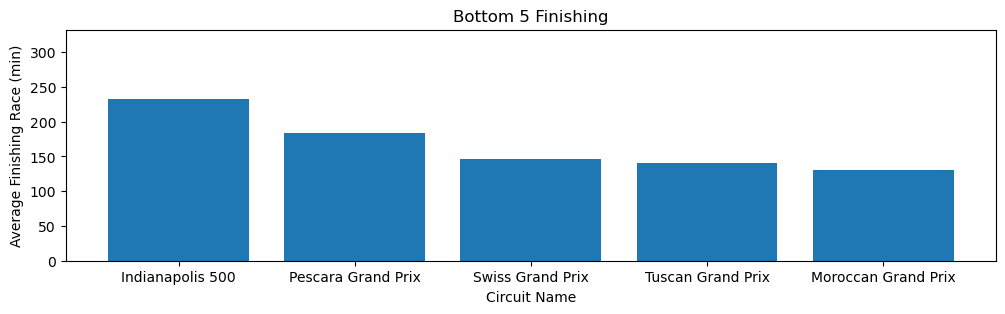

In [15]:
#fig, (top_5, bottom_5) = plt.subplots(2, 1, figsize=(8, 6))

index = 1
xlist = [fastest_circuit["name"].tail(5), fastest_circuit["name"].head(5)]
height_list = [fastest_circuit["avg_finish_time"].tail(5), fastest_circuit["avg_finish_time"].head(5)]
title_list = ["Top 5 Finishing Time","Bottom 5 Finishing"]

for variable_name in range(len(xlist)):
    plt.figure(figsize=(12,3))
    plt.bar(x= xlist[variable_name], height= height_list[variable_name])
    plt.xlabel("Circuit Name")
    plt.ylabel("Average Finishing Race (min)")
    plt.title(title_list[variable_name])
    plt.ylim(0, fastest_circuit["avg_finish_time"].iloc[0] + 100)
    plt.show()


#### Findings

Here, we define the fastest track as the tacing track with the shortest average finishing time.

There is a observable significant gap in time between the fastest and slowest finishing time of the F1 race, with the top approximately finishing under two hours and the bottom approximately completing close to four hours. 

We were also interested in comparing the length of each track to each other to observe correlation. Since the provided data set did not provide the total length of the race tracks, we needed to find them from online.
We investigaed the total race track length of the top five tracks given their little variability in finishing time:

1. Italian- 306.720 km
2. Australia- 307.574 km
3. Qatar- 306.660 km
4. Styrian- 306.452km
5. 70th anniversary- 306.198km

As expected, the top five fastest race yielded the fastest racing time in accordance to the similar, shorter racing distance the Formula One organizers set for the track. 

We also researched the total length of the bottom five tracks that had more variaity in duration to them:

1. Indianapolis 500- 804.67km
2. Pescara Grand Prix- 547km 
3. Swiss Grand Prix- 304 km
4. Tuscan Grand Prix-  309.57 km
5. Moroccan Grand Prix- Data unavailable; there has only been one Moroccan Grand Prix race

It is notable that despite Swiss and Tuscan Grand Prix race track having around the same raced distance as most of the other tracks, including the top five, they had a signficantly slower average finishing time than the top five. 


# Conclusion

From the data above, we can conclude that there does exist a signficant difference in the range of the average racing time for each track. This is indicative that the drivers would need to factor in the specific track they will be racing on when strategizing for the competition. As the drivers are put through intense physical stress in a high speed environment, information as the average completion time will be crucial to adjust the team and ensure each racer's safety and performance. We also found that most of the track raced distance are around the same as a limit set by the F1 organizer. Our data analysis expands upon the common knowledge related to F1 race and provides an insight into how the F1 racer may prepare for their races.